In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
face_cascade = cv2.CascadeClassifier('/workspaces/cs506-hos06-spring-2025-Ashwin9515/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/workspaces/cs506-hos06-spring-2025-Ashwin9515/haarcascade_eye.xml')

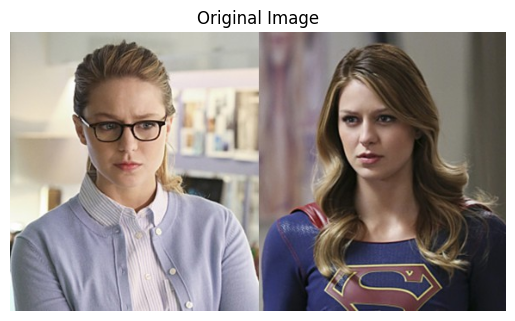

In [15]:
img = cv2.imread('/workspaces/cs506-hos06-spring-2025-Ashwin9515/img/sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [16]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return img

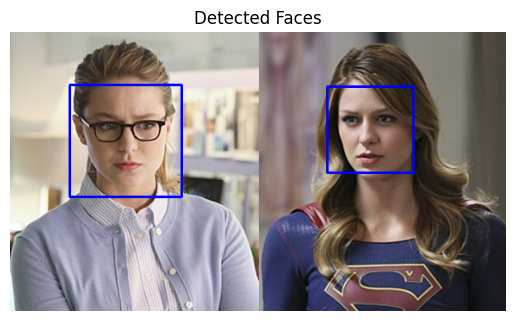

In [17]:
detected_faces_img = detect_face(img.copy())
plt.imshow(cv2.cvtColor(detected_faces_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Faces")
plt.show()

In [18]:
def detect_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)
    
    for (x, y, w, h) in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return img

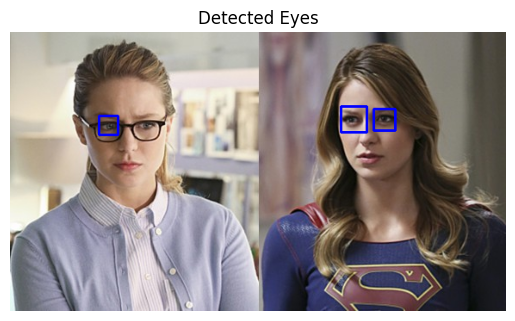

In [19]:
detected_eyes_img = detect_eyes(img.copy())
plt.imshow(cv2.cvtColor(detected_eyes_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Eyes")
plt.show()

In [23]:
def detect_face_and_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
    
    return img

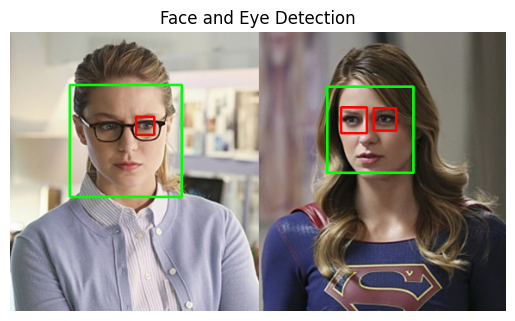

In [21]:
combined_img = detect_face_and_eyes(img.copy())
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Face and Eye Detection")
plt.show()

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Tune scaleFactor and minNeighbors
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=4)

In [26]:
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30), maxSize=(60, 60))

### Challenge 1 : Test on Image with No Face

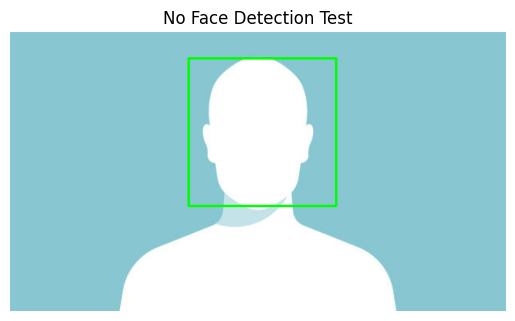

In [27]:
img_no_face = cv2.imread('/workspaces/cs506-hos06-spring-2025-Ashwin9515/img/no face.jpg')
result = detect_face_and_eyes(img_no_face.copy())

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("No Face Detection Test")
plt.show()

### Challenge 2: Test on Images with No Eyes

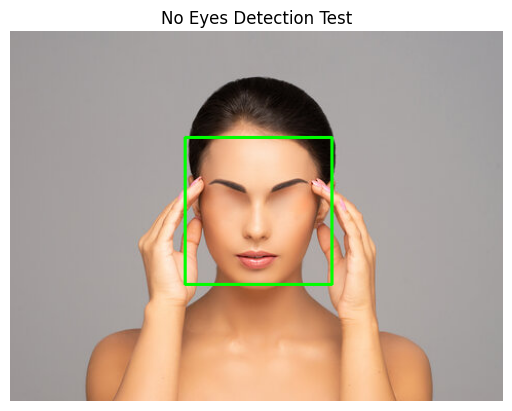

In [28]:
img_no_eyes = cv2.imread('/workspaces/cs506-hos06-spring-2025-Ashwin9515/img/no eyes.jpg')
result = detect_face_and_eyes(img_no_eyes.copy())

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("No Eyes Detection Test")
plt.show()